In [63]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [64]:
data = pd.read_csv("energydata_complete.csv")

In [65]:
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [66]:
X = data.iloc[:, 1:-2].values
y = data.iloc[:, 27].values

In [67]:
X.shape, y.shape

((19735, 26), (19735,))

In [68]:
headers = data.columns
headers = list(headers)
headers.pop(0)

'date'

In [69]:
headers.pop(-1)
headers.pop(-1)

'rv1'

In [70]:
headers

['Appliances',
 'lights',
 'T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint']

In [71]:
correl = data.corr()
correl['rv1'].sort_values(ascending=False)

rv2            1.000000
rv1            1.000000
RH_out         0.020441
RH_6           0.011671
RH_2           0.006275
RH_8           0.004480
RH_7           0.001820
Press_mm_hg    0.000699
lights         0.000521
RH_3          -0.000477
RH_1          -0.000699
T9            -0.001227
RH_4          -0.001787
T4            -0.001815
RH_9          -0.002955
T8            -0.003210
T7            -0.003900
Tdewpoint     -0.003943
T3            -0.005194
T5            -0.005490
Visibility    -0.005889
T1            -0.006203
RH_5          -0.011056
T2            -0.011087
Appliances    -0.011145
Windspeed     -0.011342
T6            -0.015086
T_out         -0.015216
Name: rv1, dtype: float64

In [72]:
cor_val = correl['rv1']
cor_val

Appliances    -0.011145
lights         0.000521
T1            -0.006203
RH_1          -0.000699
T2            -0.011087
RH_2           0.006275
T3            -0.005194
RH_3          -0.000477
T4            -0.001815
RH_4          -0.001787
T5            -0.005490
RH_5          -0.011056
T6            -0.015086
RH_6           0.011671
T7            -0.003900
RH_7           0.001820
T8            -0.003210
RH_8           0.004480
T9            -0.001227
RH_9          -0.002955
T_out         -0.015216
Press_mm_hg    0.000699
RH_out         0.020441
Windspeed     -0.011342
Visibility    -0.005889
Tdewpoint     -0.003943
rv1            1.000000
rv2            1.000000
Name: rv1, dtype: float64

In [73]:
high_cor = [i for i in correl if correl['rv1'][i] > 0.003 or correl['rv1'][i] < -0.005]

In [74]:
high_cor.pop(-1)

'rv2'

In [75]:
high_cor.pop(-1)

'rv1'

In [76]:
low_correl = [i for i in cor_val.index if i not in high_cor]
low_correl

['lights',
 'RH_1',
 'RH_3',
 'T4',
 'RH_4',
 'T7',
 'RH_7',
 'T8',
 'T9',
 'RH_9',
 'Press_mm_hg',
 'Tdewpoint',
 'rv1',
 'rv2']

In [77]:
low_correl.pop(-1)
low_correl.pop(-1)
low_correl

['lights',
 'RH_1',
 'RH_3',
 'T4',
 'RH_4',
 'T7',
 'RH_7',
 'T8',
 'T9',
 'RH_9',
 'Press_mm_hg',
 'Tdewpoint']

In [78]:
high_index = []
for i in high_cor:
    high_index.append(headers.index(i))
    
high_index

[0, 2, 4, 5, 6, 10, 11, 12, 13, 17, 20, 22, 23, 24]

In [79]:
low_index = []
for i in low_correl:
    low_index.append(headers.index(i))
    
low_index

[1, 3, 7, 8, 9, 14, 15, 16, 18, 19, 21, 25]

In [80]:
len(high_cor), len(low_correl)

(14, 12)

In [81]:
X_train_A = X[:, tuple(high_index)]
X_train_B = X[:, tuple(low_index)]

In [82]:
y =  np.asarray(y).astype(np.float32)
y

array([13.275434 , 18.606195 , 28.642668 , ..., 29.199118 ,  6.3227835,
       34.11885  ], dtype=float32)

In [83]:
X_train_A =  np.asarray(X_train_A).astype(np.int32)
X_train_B =  np.asarray(X_train_B).astype(np.int32)

In [84]:
keras.backend.clear_session()

In [85]:
from tensorflow import keras
import tensorflow as tf

input_A = keras.layers.Input(shape=[12], name="less_correlation")
input_B = keras.layers.Input(shape=[14], name="high_correlation")

hidden1 = keras.layers.Dense(10, activation="selu", kernel_initializer="lecun_normal")(input_B)
hidden2 = keras.layers.Dense(10, activation="selu", kernel_initializer="lecun_normal")(hidden1)
hidden3 = keras.layers.Dense(10, activation="selu", kernel_initializer="lecun_normal")(hidden2)

concat = keras.layers.Concatenate()([input_A, hidden3])

hidden4 = keras.layers.Dense(8, activation="selu", kernel_initializer="lecun_normal")(concat)
hidden5 = keras.layers.Dense(8, activation="selu", kernel_initializer="lecun_normal")(hidden4)
hidden6 = keras.layers.Dense(6, activation="selu", kernel_initializer="lecun_normal")(hidden5)

output = keras.layers.Dense(1, name="output")(hidden6)

model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [86]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999), metrics=["mean_squared_error"])

In [87]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
high_correlation (InputLayer)   [(None, 14)]         0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 10)           150         high_correlation[0][0]           
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 10)           110         dense[0][0]                      
__________________________________________________________________________________________________
less_correlation (InputLayer)   [(None, 12)]         0                                            
______________________________________________________________________________________________

In [88]:
import time

start = time.time()
history = model.fit({"less_correlation": X_train_B, "high_correlation" : X_train_A}, y, epochs=100)
time.sleep(1)
end = time.time()
print(f"Runtime of the program is {end - start}")

Epoch 1/100
617/617 [==============================] - 2s 2ms/step - loss: 240.7214 - mean_squared_error: 240.7214
Epoch 2/100
617/617 [==============================] - 1s 2ms/step - loss: 211.1785 - mean_squared_error: 211.1785
Epoch 3/100
617/617 [==============================] - 1s 2ms/step - loss: 211.5334 - mean_squared_error: 211.5334
Epoch 4/100
617/617 [==============================] - 1s 2ms/step - loss: 211.0827 - mean_squared_error: 211.0827
Epoch 5/100
617/617 [==============================] - 1s 2ms/step - loss: 211.2133 - mean_squared_error: 211.2133
Epoch 6/100
617/617 [==============================] - 1s 2ms/step - loss: 211.1360 - mean_squared_error: 211.1360
Epoch 7/100
617/617 [==============================] - 1s 2ms/step - loss: 210.6493 - mean_squared_error: 210.6493
Epoch 8/100
617/617 [==============================] - 1s 2ms/step - loss: 210.9163 - mean_squared_error: 210.9163
Epoch 9/100
617/617 [==============================] - 1s 2ms/step - loss: 210.8

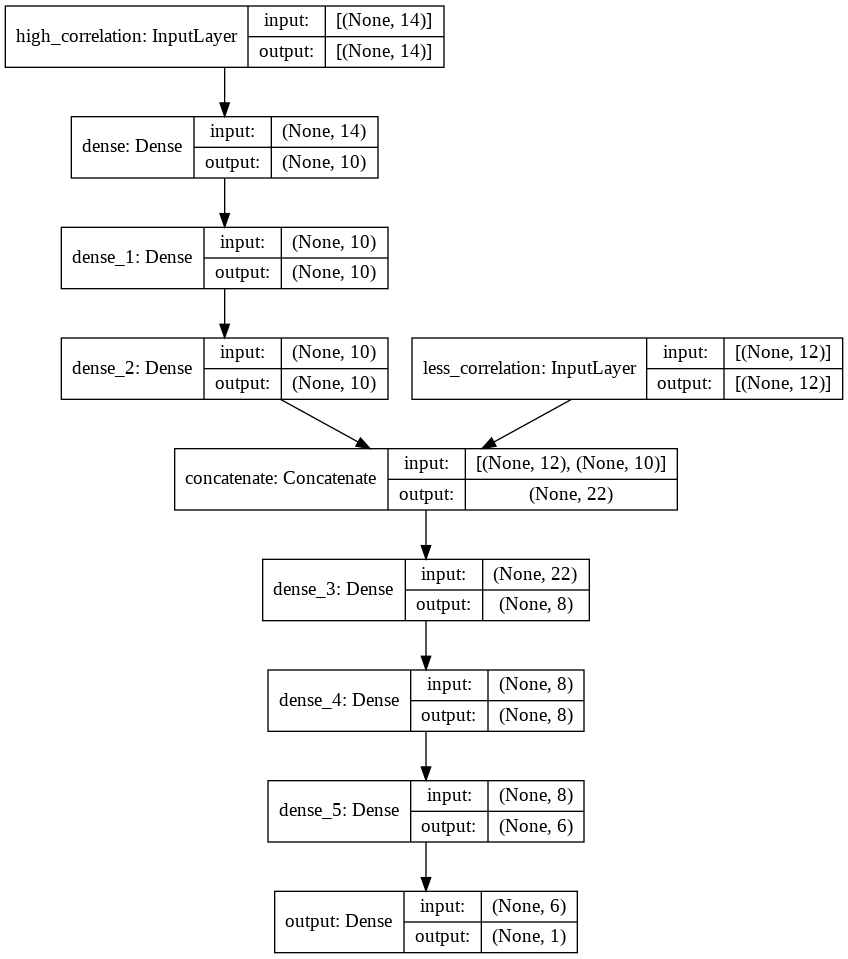

In [89]:
keras.utils.plot_model(model, "Correlation.png", show_shapes=True)

In [90]:
keras.backend.clear_session()

In [91]:
model2 = keras.models.Sequential([
    keras.layers.Dense(10, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(8, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(8, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(6, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(1)
])

In [92]:
start = time.time()

model2.compile(loss="mean_squared_error", optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999), metrics=["mean_squared_error"])

time.sleep(1)
end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 1.0101301670074463


In [93]:
start = time.time()
model2.fit(X, y, epochs=100)
time.sleep(1)
end = time.time()
print(f"Runtime of the program is {end - start}")

Epoch 1/100
617/617 [==============================] - 2s 2ms/step - loss: 577.8081 - mean_squared_error: 577.8081
Epoch 2/100
617/617 [==============================] - 1s 2ms/step - loss: 385.8442 - mean_squared_error: 385.8442
Epoch 3/100
617/617 [==============================] - 1s 2ms/step - loss: 281.9467 - mean_squared_error: 281.9467
Epoch 4/100
617/617 [==============================] - 1s 2ms/step - loss: 233.1502 - mean_squared_error: 233.1502
Epoch 5/100
617/617 [==============================] - 1s 2ms/step - loss: 215.3918 - mean_squared_error: 215.3918
Epoch 6/100
617/617 [==============================] - 1s 2ms/step - loss: 210.8863 - mean_squared_error: 210.8863
Epoch 7/100
617/617 [==============================] - 1s 2ms/step - loss: 210.1950 - mean_squared_error: 210.1950
Epoch 8/100
617/617 [==============================] - 1s 2ms/step - loss: 210.1611 - mean_squared_error: 210.1611
Epoch 9/100
617/617 [==============================] - 1s 2ms/step - loss: 210.1

In [94]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 7

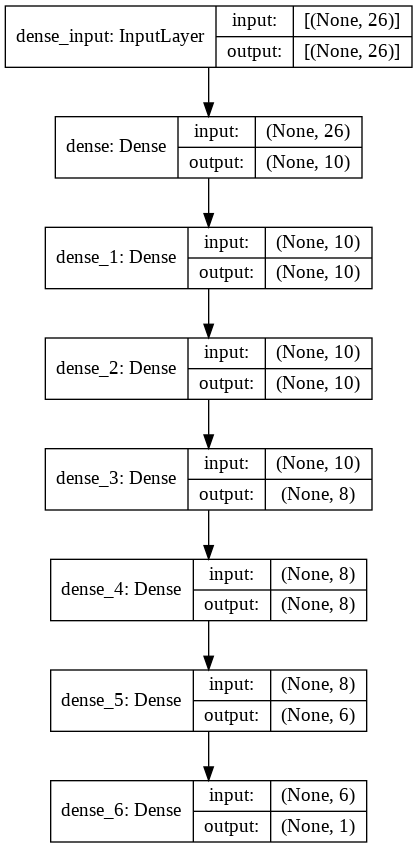

In [95]:
keras.utils.plot_model(model2, "NonCorrelation.png", show_shapes=True)